In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from model.Rebar import RoundRebar
from model.DefectFinder import DefectFinder

In [2]:
data = np.load('data.npz')['vol']

## Stability check
The stability check is that when changing hyperparameters, the model's output should not differ significantly.

The rebar was found, separated from noise, coordinates and confidences were obtained

In [3]:
rebar = RoundRebar(
    radius=4,
    points=np.array([
        [178, 47, 81],
        [175, 101, 80], 
        [168, 250, 83], 
        [163, 350, 86],
        [152, 517, 88]
    ])
)
rebar.dir_validate()
print(rebar.axis_direction)

model = DefectFinder(window=5, min_def_size=2).fit(data, rebar, ylim=(45, 570))
segm_5 = model.predict()
segm_5

Direction RMSE: 1.035
[-0.05406368  0.99839089  0.01710995]
Wilcoxon stat: 114853.0, p-value: 0.000. Distributions are separable - Rebar is clearly distinguishable from noise


segment_id    x    y   z    k   min_cdf
0           0  175  114  81   69  0.001585
1           1  164  322  85  276  0.020686
2           2  161  364  86  319  0.012902
3           3  161  372  86  328  0.003794
4           4  156  458  87  413  0.016860
5           5  154  498  88  454  0.002674

### Change radius

As the rebar radius increases, the signal is still separated from noise, but the number of defects increases - this is due to the influence of noise

In [4]:
rebar = RoundRebar(
    radius=8,
    points=np.array([
        [178, 47, 81],
        [175, 101, 80], 
        [168, 250, 83], 
        [163, 350, 86],
        [152, 517, 88]
    ])
)
rebar.dir_validate()
print(rebar.axis_direction)

model = DefectFinder(window=5, min_def_size=2).fit(data, rebar, ylim=(45, 570))
segm_r = model.predict()
segm_r

Direction RMSE: 1.035
[-0.05406368  0.99839089  0.01710995]
Wilcoxon stat: 128036.0, p-value: 0.000. Distributions are separable - Rebar is clearly distinguishable from noise


segment_id    x    y   z    k   min_cdf
0           0  176   82  81   38  0.004074
1           1  175  114  81   68  0.004708
2           2  172  172  82  128  0.029570
3           3  162  340  85  295  0.003155
4           4  162  345  85  300  0.009923
5           5  157  434  87  389  0.014345
6           6  156  458  87  414  0.001233
7           7  153  514  88  470  0.026085
8           8  152  525  88  480  0.012873

### Change window size

When changing the model's hyperparameters, the response changed significantly, some areas appeared and disappeared, and the confidences changed

In [5]:
rebar = RoundRebar(
    radius=4,
    points=np.array([
        [178, 47, 81],
        [175, 101, 80], 
        [168, 250, 83], 
        [163, 350, 86],
        [152, 517, 88]
    ]),
)
rebar.dir_validate()
print(rebar.axis_direction)

model = DefectFinder(window=3, min_def_size=2).fit(data, rebar, xlim=(45, 570))
segm_3 = model.predict()
segm_3

Direction RMSE: 1.035
[-0.05406368  0.99839089  0.01710995]
t-test stat: 7.52958429033362, p-value: 0.000. Distributions are separable - Rebar is clearly distinguishable from noise


segment_id    x    y   z    k   min_cdf
0           0  180   10  79   10  0.031189
1           1  179   36  80   36  0.016517
2           2  164  320  85  320  0.020783
3           3  161  372  86  372  0.009822
4           4  159  406  86  406  0.037711
5           5  155  474  87  474  0.012229
6           6  154  497  88  497  0.015010
7           7  150  576  89  576  0.014604
8           8  146  636  90  636  0.037890
9           9  146  640  90  640  0.021840

In [6]:
segm_5

segment_id    x    y   z    k   min_cdf
0           0  175  114  81   69  0.001585
1           1  164  322  85  276  0.020686
2           2  161  364  86  319  0.012902
3           3  161  372  86  328  0.003794
4           4  156  458  87  413  0.016860
5           5  154  498  88  454  0.002674

### Try logistic

Try logistic - the results match the cdf

In [7]:
rebar = RoundRebar(
    radius=4,
    points=np.array([
        [178, 47, 81],
        [175, 101, 80], 
        [168, 250, 83], 
        [163, 350, 86],
        [152, 517, 88]
    ]),
)
rebar.dir_validate()
print(rebar.axis_direction)

model = DefectFinder(window=5, mode='logistic', threshold=0.005).fit(data, rebar, ylim=(45, 570))
segm_logist = model.predict()
segm_logist

Direction RMSE: 1.035
[-0.05406368  0.99839089  0.01710995]
Wilcoxon stat: 114853.0, p-value: 0.000. Distributions are separable - Rebar is clearly distinguishable from noise


segment_id    x    y   z    k  max_logistic
0           0  175  114  81   69      0.392682
1           1  165  297  84  252      0.005656
2           2  164  322  85  276      0.007189
3           3  161  363  85  318      0.018088
4           4  161  365  86  320      0.011460
5           5  161  372  86  327      0.139342
6           6  156  458  87  412      0.010818
7           7  154  499  88  454      0.222367

## Checking for random orientation of a reber

If incorrect coordinates are specified, the noise check works successfully

In [8]:
rebar = RoundRebar(
    radius=4,
    points=np.array([
        [178+40, 47-7, 81+10],
        [175+30, 101-8, 80+14], 
        [168+17, 250-9, 83+15], 
        [163+10, 350-11, 86+17],
        [152+5, 517-19, 88+19]
    ]),
)
rebar.dir_validate()
print(rebar.axis_direction)

model = DefectFinder(
    window=3, 
    mode='logistic', 
    threshold=0.001,
    min_def_size=2
).fit(data, rebar, xlim=(45, 570))
model.predict()

Direction RMSE: 2.870
[-0.1292077   0.99101803  0.0344765 ]
Wilcoxon stat: 88146.0, p-value: 1.000. Distributions are NOT separable - Rebar signal is indistinguishable from noise
Distributions are NOT separable - Rebar signal is indistinguishable from noise


## Application on other rebar

For the test, I'll take another rebar and very, very roughly determine its parameters.

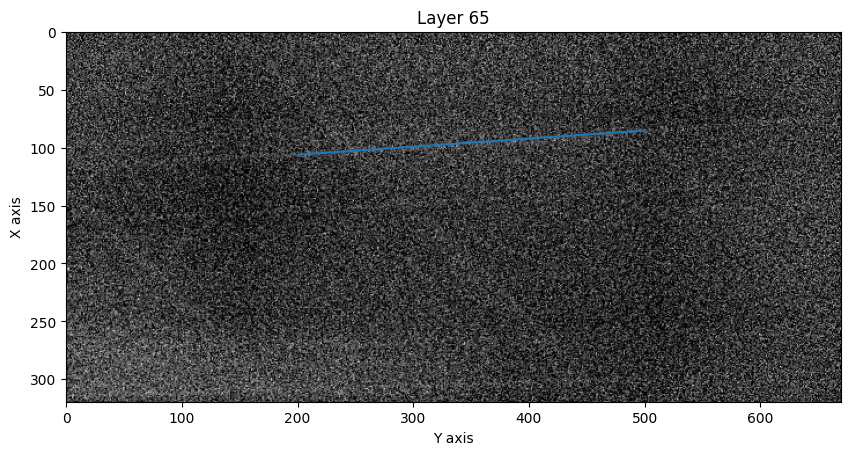

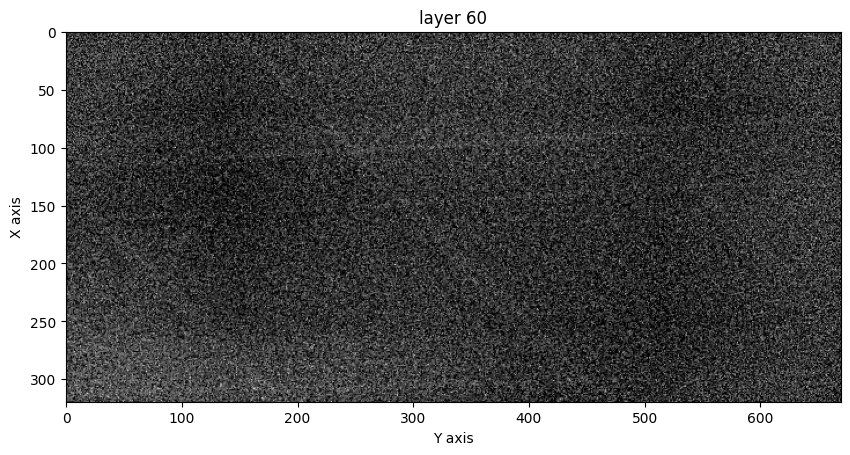

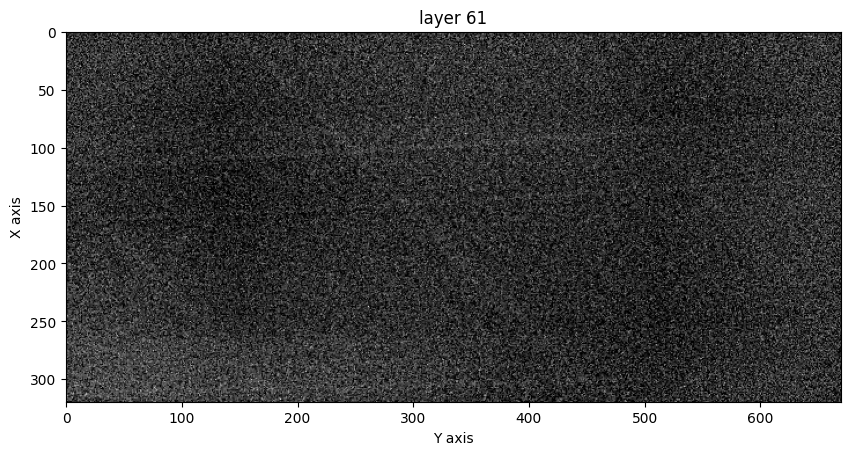

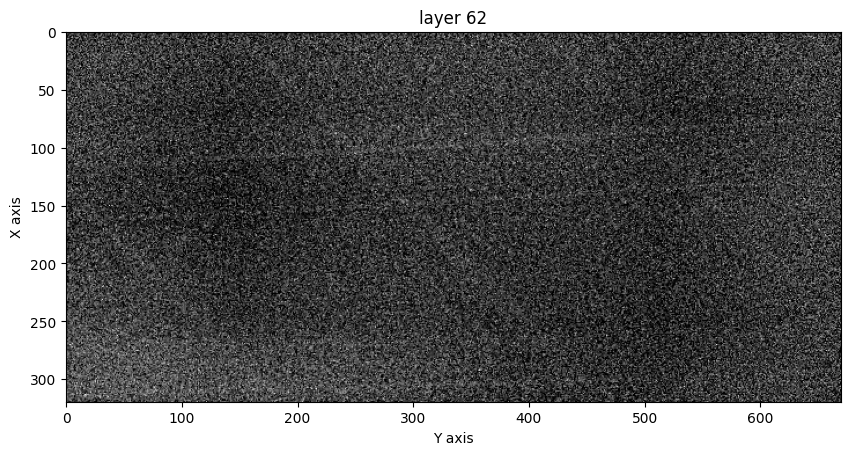

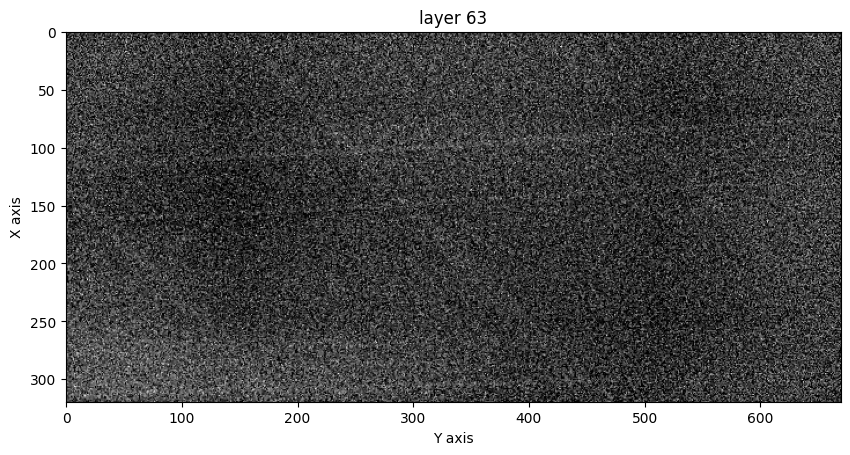

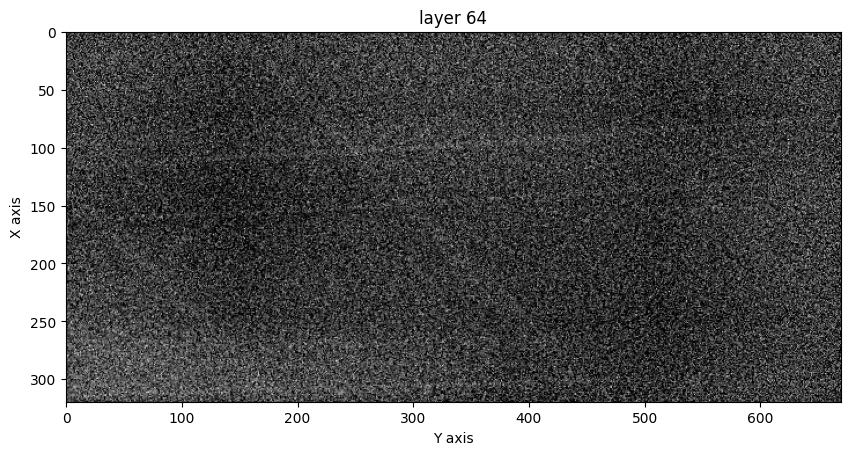

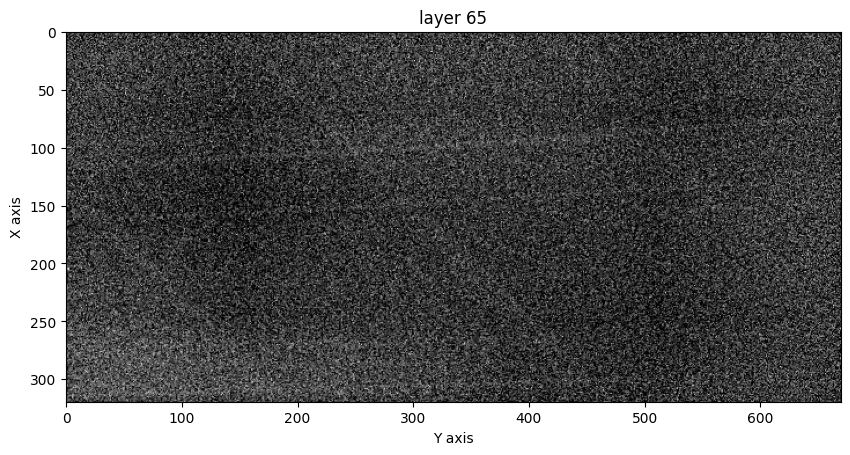

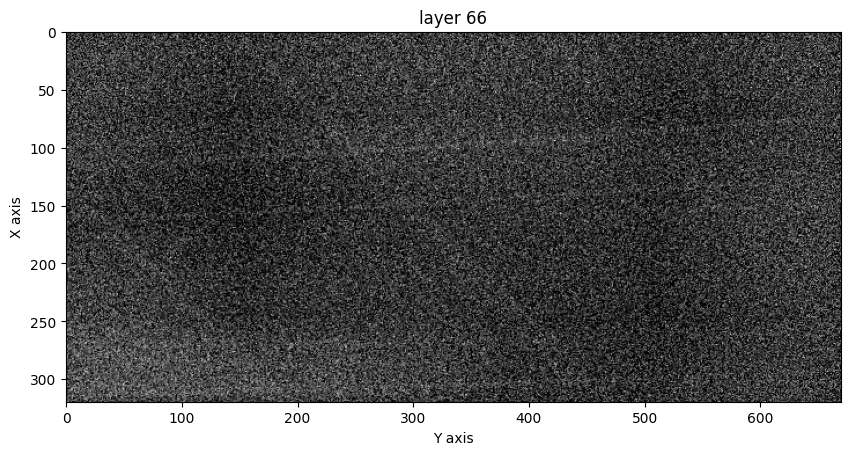

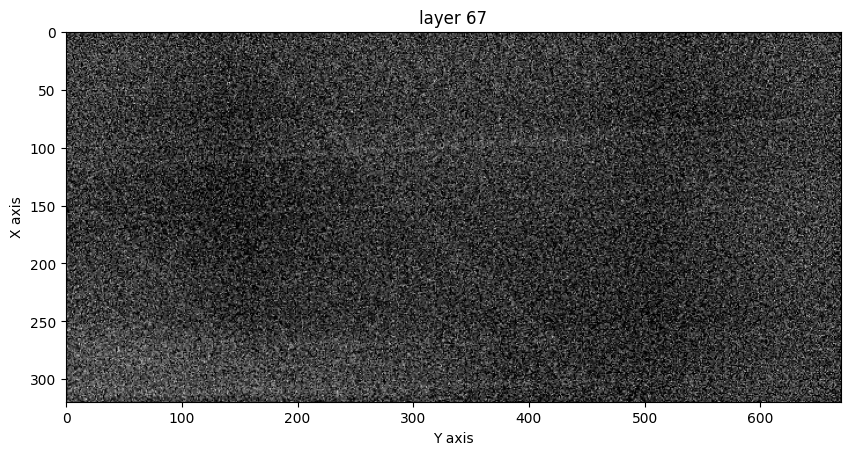

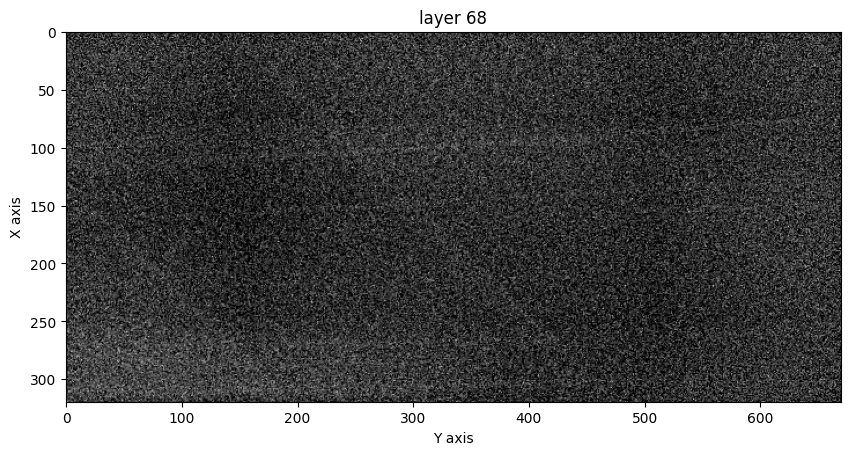

In [9]:
plt.figure(figsize=(10, 20))
plt.imshow(data[:,:, 65], cmap='gray')
plt.plot([200, 500], [106, 85])
plt.title('Layer 65')
plt.xlabel('Y axis')
plt.ylabel('X axis')
plt.show()

for layer in range(60, 69):
    plt.figure(figsize=(10, 20))
    plt.imshow(data[:,:, layer], cmap='gray')
    plt.title(f"layer {layer}")
    plt.xlabel('Y axis')
    plt.ylabel('X axis')
    plt.show()

In [10]:
rebar = RoundRebar(
    radius=4,
    points=np.array([
        [106, 200, 65],
        [85, 500, 65],
    ]),
)
rebar.dir_validate()
print(rebar.axis_direction)

model = DefectFinder(min_def_size=2).fit(data, rebar, ylim=(200, 500))
model.predict()

Direction RMSE: 0.000
[-0.06982913  0.99755897  0.        ]
Wilcoxon stat: 37335.0, p-value: 0.000. Distributions are separable - Rebar is clearly distinguishable from noise


segment_id    x    y   z    k   min_cdf
0           0  106  202  65    2  0.032905
1           1   98  318  65  118  0.012686
2           2   96  346  65  146  0.001317

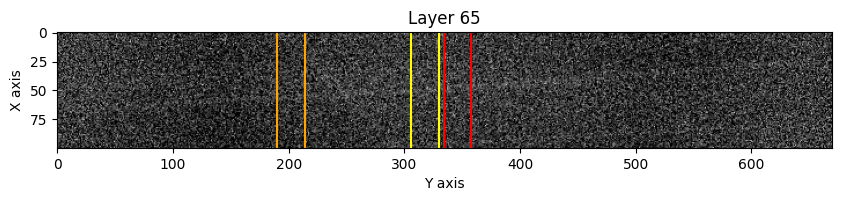

In [11]:
plt.figure(figsize=(10, 20))
plt.imshow(data[50:150,:, 65], cmap='gray')
plt.title('Layer 65')
plt.xlabel('Y axis')
plt.ylabel('X axis')

plt.axvline(202-12, color='orange')
plt.axvline(202+12, color='orange')

plt.axvline(318-12, color='yellow')
plt.axvline(318+12, color='yellow')

plt.axvline(346-12, color='red')
plt.axvline(346+12, color='red')

plt.show()

# Conclusion

The constructed model should be further refined.
The main problem remains the correct specification of the rebar parameters, namely the radius and the points along the axis. Automatic estimation of these parameters can be achieved using simple statistical methods by computing statistics within a given volume, selecting regions with elevated signal levels and then estimating the parameters.

At the moment, the model is not sufficiently stable and may change its predictions when hyperparameters are modified or when small changes are made to the rebar parameters.